In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [ ]:
import numpy as np
import tensorflow 
from tensorflow.keras.layers import Dense, Flatten, MaxPooling1D, UpSampling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import binary_accuracy, AUC
from sklearn.utils import shuffle
from tensorflow.keras.layers import LSTM, RepeatVector, TimeDistributed, Bidirectional, Dropout, Activation
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam

In [ ]:
def build_model():
    # here layers is a list with 4 elements
    
    model = Sequential()
    
    model.add(Bidirectional(LSTM(256, 
        return_sequences = True)))
    model.add(Dropout(0.2))
    
    # model.add(Bidirectional(LSTM(256, 
    #     return_sequences = True)))
    # model.add(Dropout(0.2))
    
    model.add(Bidirectional(LSTM(16,
        return_sequences = True)))
    model.add(Dropout(0.2))
    
    model.add(Bidirectional(LSTM(1,
        return_sequences = True)))
    model.add(Dropout(0.2))
    
    model.add(Bidirectional(LSTM(16,
        return_sequences = True)))
    model.add(Dropout(0.2))
    
#     model.add(Bidirectional(LSTM(256,
#         return_sequences = True)))
#     model.add(Dropout(0.2))
    
    model.add(Bidirectional(LSTM(256, 
        return_sequences = False)))
    model.add(Dropout(0.2))
    

    
    model.add(Dense(512))
    model.add(Activation("linear"))
    
    model.compile(loss="mse", optimizer=Adam(learning_rate=0.001,epsilon=1e-07))
    
    # try changing whether there is dropout, activation function, loss function, number of layers, in/out of layers
    
    return model

In [ ]:
model = build_model()
# model.summary()
model.load_weights("/content/gdrive/MyDrive/DAE_GWS_2.ckpt")


In [ ]:

postrainsamples = 2000
# negtrainsamples = 2560//4

samples = postrainsamples #+ negtrainsamples
print(samples)
# number of batches
# batch_looping_times = 256

# number of samples in each batch
# samples =  (negtrainsamples//batch_looping_times) + (postrainsamples//batch_looping_times)

pure_training_data = np.load('/content/gdrive/MyDrive/Anagh_AE_Data_Share/pure_training_DATA_4.npy')
noisy_training_data = np.load('/content/gdrive/MyDrive/Anagh_AE_Data_Share/noisy_training_DATA_4.npy')
# neg_training_data = np.load('/content/gdrive/MyDrive/negative_training_DATA.npy')



2000


In [ ]:
X = noisy_training_data
print(X.shape)

Y=pure_training_data

print(Y.shape)
X = X[:samples]
Y = Y[:samples]
print(X.shape)
print(Y.shape)
X=X.reshape((samples,512,1))
Y=Y.reshape((samples,512,1))
print(X.shape)
print(Y.shape)
X, Y = shuffle(X, Y, random_state=103)

(2000, 512)
(2000, 512)
(2000, 512)
(2000, 512)
(2000, 512, 1)
(2000, 512, 1)


In [ ]:
index = 0
batch_samples = 40
def get_data():
  global X
  global Y
  global index
  global batch_samples
  trainX = np.zeros((batch_samples, 512,1))
  trainY = np.zeros((batch_samples, 512,1))
  index = 0
  while True:
    for i in range(0,batch_samples):
      trainX[i] = X[index+i]
      trainY[i] = Y[index+i]
    index = index+ batch_samples
    if (index>= 1999):
      index = 0
    yield trainX, trainY

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint_path = "/content/gdrive/MyDrive/DAE_GWS_2.ckpt"


# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=0, 
    save_weights_only=True,
    save_freq = 1)

In [ ]:
# from tensorflow.keras.callbacks import TensorBoard
# import time

# NAME ="DAE_GWS_2"
# tensorboard = TensorBoard(log_dir ='/content/logs/{}'.format(NAME))

In [ ]:
from tensorflow.keras.models import load_model
def model_training():
    global samples
    global batch_samples
    global model


    model.fit(get_data() , epochs=10 , verbose = 1, steps_per_epoch = (samples//batch_samples), shuffle=
                            True,batch_size=batch_samples , use_multiprocessing = True, callbacks=[cp_callback])
    model.summary()
    # model.save('/content/gdrive/MyDrive/DAE_GWS_1.h5')

In [ ]:
model_training()

Epoch 1/10
50/50 [==============================] - 41s 511ms/step - loss: 0.1105
Epoch 2/10
50/50 [==============================] - 25s 502ms/step - loss: 0.0967
Epoch 3/10
50/50 [==============================] - 25s 509ms/step - loss: 0.0908
Epoch 4/10
50/50 [==============================] - 25s 510ms/step - loss: 0.0809
Epoch 5/10
50/50 [==============================] - 26s 511ms/step - loss: 0.0782
Epoch 6/10
50/50 [==============================] - 26s 511ms/step - loss: 0.0663
Epoch 7/10
50/50 [==============================] - 27s 532ms/step - loss: 0.0611
Epoch 8/10
50/50 [==============================] - 27s 539ms/step - loss: 0.0520
Epoch 9/10
50/50 [==============================] - 28s 555ms/step - loss: 0.0439
Epoch 10/10
50/50 [==============================] - 29s 572ms/step - loss: 0.0411
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_43 (Bidir

In [ ]:
# %load_ext tensorboard
# %tensorboard --logdir '/content/logs/'

In [ ]:
model_training()

Epoch 1/10
50/50 [==============================] - 43s 532ms/step - loss: 0.0284
Epoch 2/10
50/50 [==============================] - 27s 545ms/step - loss: 0.0218
Epoch 3/10
50/50 [==============================] - 27s 540ms/step - loss: 0.0191
Epoch 4/10
50/50 [==============================] - 27s 540ms/step - loss: 0.0183
Epoch 5/10
50/50 [==============================] - 28s 559ms/step - loss: 0.0182
Epoch 6/10
50/50 [==============================] - 29s 582ms/step - loss: 0.0177
Epoch 7/10
50/50 [==============================] - 30s 607ms/step - loss: 0.0166
Epoch 8/10
50/50 [==============================] - 33s 653ms/step - loss: 0.0172
Epoch 9/10
50/50 [==============================] - 30s 600ms/step - loss: 0.0162
Epoch 10/10
50/50 [==============================] - 31s 630ms/step - loss: 0.0158
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_48 (Bidir

In [ ]:
# %load_ext tensorboard
# %tensorboard --logdir '/content/logs/'

In [ ]:
model_training()


Epoch 1/10
50/50 [==============================] - 23s 266ms/step - loss: 0.0089
Epoch 2/10
50/50 [==============================] - 14s 272ms/step - loss: 0.0074
Epoch 3/10
50/50 [==============================] - 14s 277ms/step - loss: 0.0072
Epoch 4/10
50/50 [==============================] - 14s 288ms/step - loss: 0.0072
Epoch 5/10
50/50 [==============================] - 16s 316ms/step - loss: 0.0072
Epoch 6/10
50/50 [==============================] - 18s 362ms/step - loss: 0.0070
Epoch 7/10
50/50 [==============================] - 20s 409ms/step - loss: 0.0072
Epoch 8/10
50/50 [==============================] - 21s 421ms/step - loss: 0.0071
Epoch 9/10
50/50 [==============================] - 24s 483ms/step - loss: 0.0071
Epoch 10/10
50/50 [==============================] - 24s 476ms/step - loss: 0.0072
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_12 (Bidire

In [ ]:
model_training()

Epoch 1/10
50/50 [==============================] - 43s 555ms/step - loss: 0.0081
Epoch 2/10
50/50 [==============================] - 28s 562ms/step - loss: 0.0071
Epoch 3/10
50/50 [==============================] - 29s 579ms/step - loss: 0.0068
Epoch 4/10
50/50 [==============================] - 29s 575ms/step - loss: 0.0067
Epoch 5/10
50/50 [==============================] - 29s 589ms/step - loss: 0.0067
Epoch 6/10
50/50 [==============================] - 29s 579ms/step - loss: 0.0064
Epoch 7/10
50/50 [==============================] - 31s 626ms/step - loss: 0.0063
Epoch 8/10
50/50 [==============================] - 32s 639ms/step - loss: 0.0062
Epoch 9/10
50/50 [==============================] - 32s 640ms/step - loss: 0.0062
Epoch 10/10
50/50 [==============================] - 33s 668ms/step - loss: 0.0063
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_58 (Bidir

In [ ]:
model_training()

Epoch 1/10
50/50 [==============================] - 46s 576ms/step - loss: 0.0024
Epoch 2/10
50/50 [==============================] - 30s 592ms/step - loss: 0.0018
Epoch 3/10
50/50 [==============================] - 31s 613ms/step - loss: 0.0017
Epoch 4/10
50/50 [==============================] - 30s 594ms/step - loss: 0.0017
Epoch 5/10
50/50 [==============================] - 32s 635ms/step - loss: 0.0017
Epoch 6/10
50/50 [==============================] - 33s 662ms/step - loss: 0.0017
Epoch 7/10
50/50 [==============================] - 36s 715ms/step - loss: 0.0017
Epoch 8/10
50/50 [==============================] - 40s 788ms/step - loss: 0.0016
Epoch 9/10
50/50 [==============================] - 36s 728ms/step - loss: 0.0017
Epoch 10/10
50/50 [==============================] - 40s 800ms/step - loss: 0.0016
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_63 (Bidir

In [ ]:
!mkdir -p /content/gdrive/MyDrive/
model.save('/content/gdrive/MyDrive/DAE_GWS_2')

INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/DAE_GWS_2/assets


INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/DAE_GWS_2/assets


In [ ]:
new_model = tensorflow.keras.models.load_model('/content/gdrive/MyDrive/DAE_GWS_2')

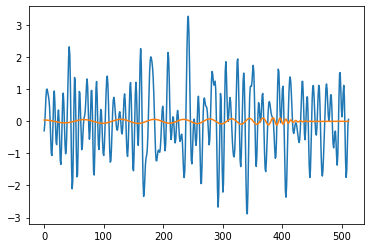

In [ ]:
p = X[500]
q = Y[500]
# print(p)
# print(q)

import matplotlib.pyplot as plt

plt.plot(range(0, len(p)), p)

# plt.figure()
plt.plot(range(0, len(p)), q)

In [ ]:
p = p.reshape((1, 512, 1))
s = model.predict(p)

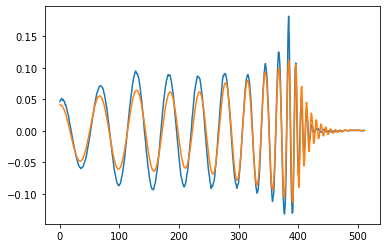

In [ ]:
import matplotlib.pyplot as plt
s = s.reshape((512,1))
plt.plot(s)
plt.plot(q)